##Data Cleaning

In [147]:
!pip install kagglehub[pandas-datasets]

In [148]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "used_cars.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "taeefnajib/used-car-price-prediction-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

First 5 records:       brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed 

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df=pd.read_csv('/kaggle/input/used-car-price-prediction-dataset/used_cars.csv')

In [151]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [152]:
for col in df.columns:
    print(col,df[col].nunique())

brand 57
model 1898
model_year 34
milage 2818
fuel_type 7
engine 1146
transmission 62
ext_col 319
int_col 156
accident 2
clean_title 1
price 1569


In [153]:
df=df.drop('model',axis=1)

In [154]:
df

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [155]:
import re

In [156]:
df['fuel_capacity'] = df['engine'].str.extract(r'(\d+\.?\d*\s*(?:L|Liter|Litre))')

In [157]:
df['hp'] = df['engine'].str.extract(r'(\d+\.?\d*HP)')


In [158]:
df['fuel_capacity_int'] = df['fuel_capacity'].str.extract(r'(\d+\.?\d*)')

In [159]:
df['hp_int'] = df['engine'].str.extract(r'(\d+\.?\d*)')

In [160]:
df=df.drop(['engine','fuel_capacity','engine'],axis=1)

In [161]:
df=df.drop(['hp'],axis=1)

In [162]:
df['milage_int'] = df['milage'].str.extract(r'((?:\d{1,3},)*\d+\.?\d*)')

In [163]:
df['milage_int'] = df['milage_int'].str.replace(',', '').astype(int)

In [164]:
df['price_int'] = df['price'].str.extract(r'((?:\d{1,3},)*\d+\.?\d*)')

In [165]:
df['price_int'] = df['price_int'].str.replace(',', '').astype(int)

In [166]:
df=df.drop('price',axis=1)

In [167]:
df.drop('transmission',axis=1,inplace=True)

In [168]:
df.drop('milage',axis=1,inplace=True)

In [169]:
df['accident_int']=df['accident'].str.extract(r'(\d+)')

In [170]:
df['accident_int']=df['accident_int'].fillna(0)

In [171]:
df['accident_int']=df['accident_int'].astype(int)

In [172]:
df.drop('accident',axis=1,inplace=True)

In [173]:
df['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [174]:
df['clean_title']=df['clean_title'].replace('Yes',1)
df['clean_title']=df['clean_title'].fillna(0)

In [175]:
df['clean_title']=df['clean_title'].astype(int)

In [176]:
df[['fuel_capacity_int','hp_int']]=df[['fuel_capacity_int','hp_int']].astype(float)

In [177]:
df.drop(['fuel_type','ext_col','int_col'],axis=1,inplace=True)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              4009 non-null   object 
 1   model_year         4009 non-null   int64  
 2   clean_title        4009 non-null   int64  
 3   fuel_capacity_int  3792 non-null   float64
 4   hp_int             3931 non-null   float64
 5   milage_int         4009 non-null   int64  
 6   price_int          4009 non-null   int64  
 7   accident_int       4009 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 250.7+ KB


In [179]:
for col in df.columns:
    print(col,df[col].isnull().sum())

brand 0
model_year 0
clean_title 0
fuel_capacity_int 217
hp_int 78
milage_int 0
price_int 0
accident_int 0


In [180]:
df['fuel_capacity_int']=df['fuel_capacity_int'].fillna(df['fuel_capacity_int'].median())
df['hp_int']=df['hp_int'].fillna(df['hp_int'].median())

<Axes: >

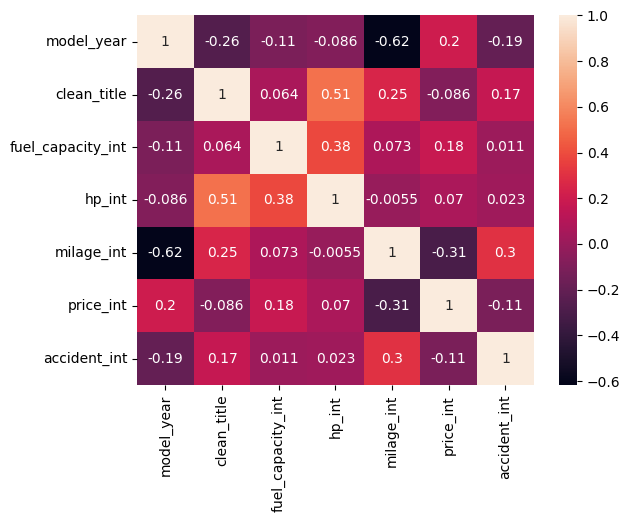

In [181]:
corr=df.drop('brand',axis=1).corr()
sns.heatmap(corr,annot=True)

##Feature encoding and Scaling

In [245]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Apply LabelEncoder to the 'brand' column in the original DataFrame
le = LabelEncoder()
df['brand_encoded'] = le.fit_transform(df['brand'])

# Now create the feature matrix X using the encoded 'brand' column and other features
X = df[['brand_encoded', 'model_year', 'clean_title',
       'fuel_capacity_int', 'hp_int', 'milage_int',
       'accident_int']]

In [249]:
y=df['price_int']

In [250]:
num_features = ['brand_encoded', 'model_year', 'clean_title',
       'fuel_capacity_int', 'hp_int', 'milage_int',
       'accident_int']


from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


numeric_transformer = StandardScaler()


preprocessor = ColumnTransformer(
    [
        ("StandardScaler", numeric_transformer, num_features)

    ],remainder='passthrough'

)

In [251]:
X=preprocessor.fit_transform(X)

In [247]:
# This cell is no longer needed as LabelEncoder is applied before creating X
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# X['brand']=le.fit_transform(X['brand'])

In [248]:
# This cell is no longer needed as the brand column is now encoded in X
# print(X['brand'])

In [252]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,-0.588309,-0.412118,0.417883,0.018513,0.170492,-0.262336,1.750978
1,-0.283037,0.898486,0.417883,0.091027,-1.600759,-0.573255,1.750978
2,0.205398,1.062312,-2.393013,-0.126516,-1.602553,-0.809820,-0.571109
3,-0.221983,-0.084467,0.417883,-0.126516,0.493407,0.462467,-0.571109
4,-1.259907,0.898486,-2.393013,-1.214233,-1.611523,-1.049579,-0.571109
...,...,...,...,...,...,...,...
4004,-1.137798,1.226137,0.417883,1.686346,-1.587603,-1.224010,-0.571109
4005,-1.259907,1.062312,0.417883,-0.489088,0.463507,-1.029212,-0.571109
4006,1.182268,1.062312,-2.393013,-0.126516,0.110692,-1.197198,-0.571109
4007,-0.588309,0.734661,0.417883,-0.126516,1.067479,-0.606569,-0.571109


In [257]:
for col in pd.DataFrame(X).columns:
    print(col,pd.DataFrame(X)[col].isnull().sum())

0 0
1 0
2 0
3 0
4 0
5 0
6 0


##Model Training

In [258]:
from sklearn.model_selection import train_test_split


# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((3207, 7), (802, 7))

In [259]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [260]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [267]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor(),
    "Xgboost Regressor":XGBRegressor()

}


r2_scores={}


for i in range(len(list(models))):
    model = list(models.values())[i]
    # Train model with the imputed data
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    r2_scores[list(models.keys())[i]]=model_test_r2


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

print(r2_scores)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 43429.5960
- Mean Absolute Error: 21112.3803
- R2 Score: 0.2804
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 139122.1316
- Mean Absolute Error: 28950.5850
- R2 Score: 0.0531


Lasso
Model performance for Training set
- Root Mean Squared Error: 43429.5961
- Mean Absolute Error: 21112.0582
- R2 Score: 0.2804
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 139122.1183
- Mean Absolute Error: 28950.3323
- R2 Score: 0.0531


Ridge
Model performance for Training set
- Root Mean Squared Error: 43429.5967
- Mean Absolute Error: 21110.1982
- R2 Score: 0.2804
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 139123.1217
- Mean Absolute Error: 28948.6409
- R2 Score: 0.0531


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 26298.1709
- Mean Absolute E

In [271]:
for key, value in r2_scores.items():
    print(key, value)

Linear Regression 0.0530639093441061
Lasso 0.053064090148520426
Ridge 0.053050430513399305
K-Neighbors Regressor 0.14094514113494783
Decision Tree 0.09712362471792568
Random Forest Regressor 0.13566952117239128
Adaboost Regressor 0.11033869981172217
Graident BoostRegressor 0.15211557354196914
Xgboost Regressor 0.1347699761390686


##Hyperparameter tunning

In [272]:
#Initialize few parameter for Hyperparamter tuning

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [274]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestRegressor(), rf_params),
                   ("XGboost",XGBRegressor(),xgboost_params)

                   ]

In [275]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 